In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels
import sklearn.metrics

In [3]:
ogauge = pd.read_excel(r'C:\Users\Ronny\Desktop\Project_2022\Ogauge_testing\Ranging19_5bar.xls')

In [4]:
ogauge.head()

,Time,PRESSURE
0,12:30:17,5.004
1,12:30:18,5.009
2,12:30:19,5.011
3,12:30:20,5.012
4,12:30:21,5.015


In [5]:
ogauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      4849 non-null   object 
 1   PRESSURE  4849 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.9+ KB


### Forecasting using Moving Average

In [6]:
ogauge['mavg'] = ogauge['PRESSURE'].rolling(window=12).mean().shift(1)
ogauge

,Time,PRESSURE,mavg
0,12:30:17,5.004,NaN
1,12:30:18,5.009,NaN
2,12:30:19,5.011,NaN
3,12:30:20,5.012,NaN
4,12:30:21,5.015,NaN
...,...,...,...
4844,13:59:56,5.027,5.028250
4845,13:59:57,5.027,5.028167
4846,13:59:58,5.028,5.028083
4847,13:59:59,5.029,5.028083


### to diplay upto 2 decimal use pd.options.display.float_format= '{:.2f}'.format

In [7]:
pd.options.display.float_format= '{:.2f}'.format
ogauge

,Time,PRESSURE,mavg
0,12:30:17,5.00,NaN
1,12:30:18,5.01,NaN
2,12:30:19,5.01,NaN
3,12:30:20,5.01,NaN
4,12:30:21,5.01,NaN
...,...,...,...
4844,13:59:56,5.03,5.03
4845,13:59:57,5.03,5.03
4846,13:59:58,5.03,5.03
4847,13:59:59,5.03,5.03


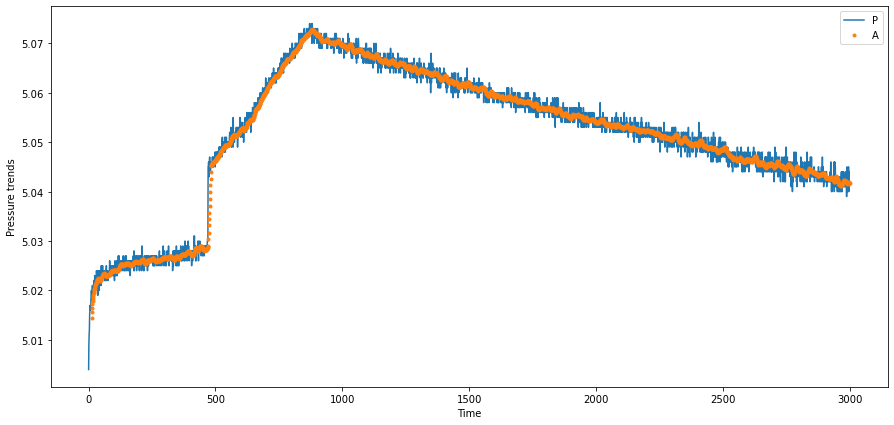

In [8]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000] );
plt.plot( ogauge['mavg'][0:3000], '.' );
plt.legend('PA');

### MAPE and RMSE

In [9]:
def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

get_mape( ogauge['PRESSURE'][40:].values, 
          ogauge['mavg'][40:].values)

0.02

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error( ogauge['PRESSURE'][36:].values, 
                            ogauge['mavg'][36:].values))

0.0013939371398384935

### Exponential smoothing

In [11]:
ogauge

,Time,PRESSURE,mavg
0,12:30:17,5.00,NaN
1,12:30:18,5.01,NaN
2,12:30:19,5.01,NaN
3,12:30:20,5.01,NaN
4,12:30:21,5.01,NaN
...,...,...,...
4844,13:59:56,5.03,5.03
4845,13:59:57,5.03,5.03
4846,13:59:58,5.03,5.03
4847,13:59:59,5.03,5.03


In [12]:
ogauge['ewm'] = ogauge['PRESSURE'].ewm(alpha=0.2).mean()
ogauge

,Time,PRESSURE,mavg,ewm
0,12:30:17,5.00,NaN,5.00
1,12:30:18,5.01,NaN,5.01
2,12:30:19,5.01,NaN,5.01
3,12:30:20,5.01,NaN,5.01
4,12:30:21,5.01,NaN,5.01
...,...,...,...,...
4844,13:59:56,5.03,5.03,5.03
4845,13:59:57,5.03,5.03,5.03
4846,13:59:58,5.03,5.03,5.03
4847,13:59:59,5.03,5.03,5.03


In [13]:
pd.options.display.float_format= '{:.2f}'.format

In [14]:
MAPE=get_mape( ogauge['PRESSURE'][40:].values, 
          ogauge['ewm'][40:].values)
RMSE=np.sqrt(mean_squared_error( ogauge['PRESSURE'][36:].values, 
                            ogauge['ewm'][36:].values))
MAPE,RMSE

(0.02, 0.001100395734274552)

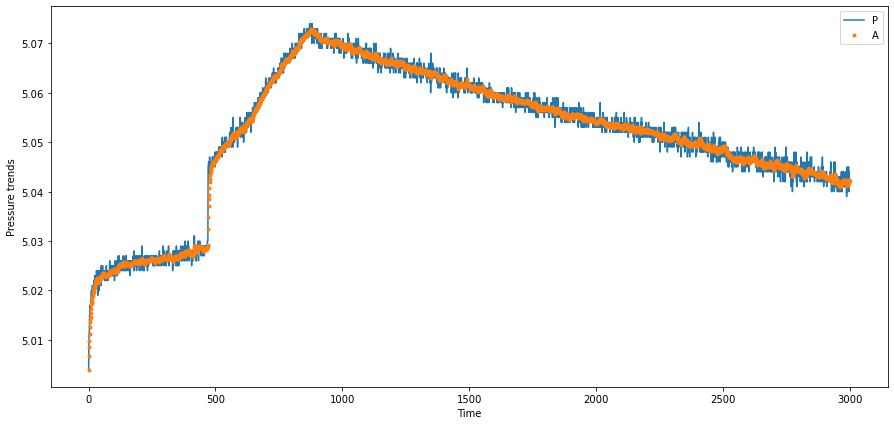

In [15]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000] );
plt.plot( ogauge['ewm'][0:3000], '.' );
plt.legend('PA');

### We can decompose time-series data into trend,seasonal,cyclical and residual components

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

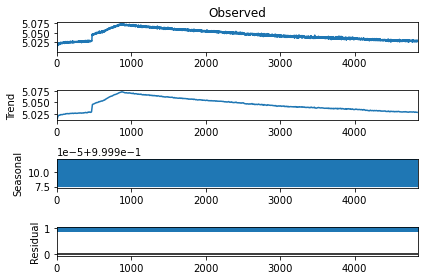

In [17]:
ts_decompose = seasonal_decompose(np.array(ogauge['PRESSURE']), model="multiplicative", period=12)
ts_plot = ts_decompose.plot()

In [18]:
ogauge['seasonal'] = ts_decompose.seasonal
ogauge['trend'] = ts_decompose.trend
ogauge['residual'] = ts_decompose.resid
ogauge

,Time,PRESSURE,mavg,ewm,seasonal,trend,residual
0,12:30:17,5.00,NaN,5.00,1.00,NaN,NaN
1,12:30:18,5.01,NaN,5.01,1.00,NaN,NaN
2,12:30:19,5.01,NaN,5.01,1.00,NaN,NaN
3,12:30:20,5.01,NaN,5.01,1.00,NaN,NaN
4,12:30:21,5.01,NaN,5.01,1.00,NaN,NaN
...,...,...,...,...,...,...,...
4844,13:59:56,5.03,5.03,5.03,1.00,NaN,NaN
4845,13:59:57,5.03,5.03,5.03,1.00,NaN,NaN
4846,13:59:58,5.03,5.03,5.03,1.00,NaN,NaN
4847,13:59:59,5.03,5.03,5.03,1.00,NaN,NaN


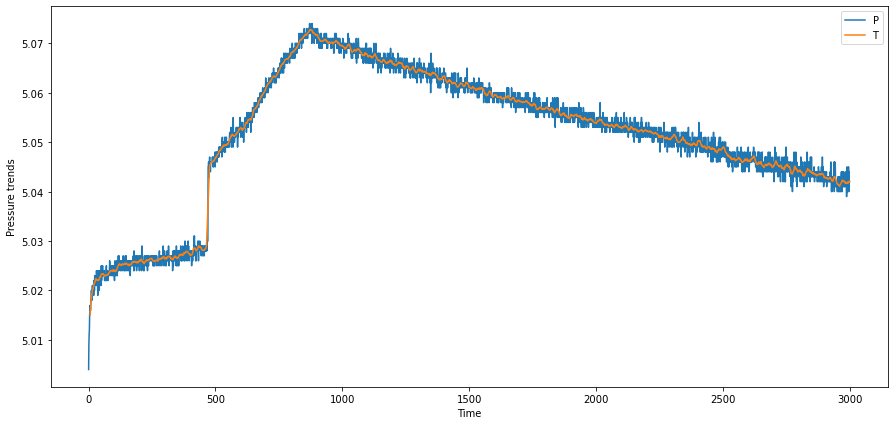

In [19]:
plt.figure( figsize=(15,7))
plt.xlabel( "Time" )
plt.ylabel( "Pressure trends" )
plt.plot( ogauge['PRESSURE'][0:3000], );
plt.plot( ogauge['trend'][0:3000]);
plt.legend('PT')

### Stationarity test

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                'Lags Used',
                                'Number of Observations Used'])
    print( adfuller_out )

In [22]:
adfuller_test(ogauge.PRESSURE)

Test Statistic                  -1.14
p-value                          0.70
Lags Used                       32.00
Number of Observations Used   4816.00
dtype: float64


### p value <=0.05 
therefore we can reject the null hypothesis and can go with alternative hypothesis.

In [23]:
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=12).mean()
    #Variance is equal to the average squared deviations from the mean
    #Standard deviation is square root of Variancs
    movingSTD = timeseries.rolling(window=12).std()
    
    plt.figure( figsize=(15,7))
    plt.xlabel( "Time" )
    plt.ylabel( "Pressure trends" )
    #plt.plot(timeseries, color='red', label='Original')
    plt.plot(movingAverage, color='green', label='Rolling Mean')
    plt.plot(movingSTD, color='BLUE', label='Rolling Std')
    plt.legend()

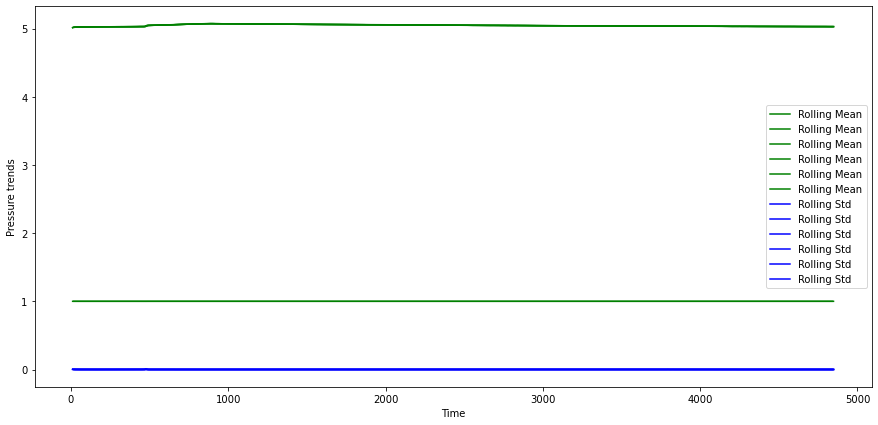

In [24]:
test_stationarity(ogauge)

# Checking the optimal performing model 

In [25]:
# Create Training and Test
train = ogauge.PRESSURE[:1500]
test = ogauge.PRESSURE[1500:]

In [26]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

'''model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())'''

"model = pm.auto_arima(train, start_p=1, start_q=1,\n                      test='adf',       # use adftest to find optimal 'd'\n                      max_p=3, max_q=3, # maximum p and q\n                      m=1,              # frequency of series\n                      d=None,           # let model determine 'd'\n                      seasonal=False,   # No Seasonality\n                      start_P=0, \n                      D=0, \n                      trace=True,\n                      error_action='ignore',  \n                      suppress_warnings=True, \n                      stepwise=True)\nprint(model.summary())"

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
arima = ARIMA( train, 
              order = (0,1,2))
autoarima_model = arima.fit()
autoarima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:              ARIMA            BIC:                 -15589.0713
Dependent Variable: D.PRESSURE       Log-Likelihood:      7809.2     
Date:               2022-01-01 16:46 Scale:               1.0000     
No. Observations:   1499             Method:              css-mle    
Df Model:           3                Sample:              1          
Df Residuals:       1496                                  0          
Converged:          1.0000           S.D. of innovations: 0.001      
No. Iterations:     32.0000          HQIC:                -15602.405 
AIC:                -15610.3215                                      
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                 0.0000   0.0000   2.7521 0.0059  0.0000  0.0001
ma.L1.D.PRESSURE     -0.6462   0.0269 -24.0610 0.0000 -0.6988 -0.5936
ma.L2.D.PRESSURE      0.0198   0.0260   0.7586 0.4481 -0.0313  0.0708
------------------------------------------------------------------------------
                  Real           Imaginary          Modulus          Frequency
------------------------------------------------------------------------------
MA.1             1.6286             0.0000           1.6286             0.0000
MA.2            31.0863             0.0000          31.0863             0.0000
=====================================================================

"""

In [29]:
fc, se, conf = autoarima_model.forecast(1304, alpha=0.05)

In [30]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

ValueError: Length of passed values is 1304, index implies 3349.

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc

### Checking forecast accuracy

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

In [31]:
acf_plot = plot_acf( ogauge.PRESSURE,lags=20)

NameError: name 'plot_acf' is not defined

In [32]:
pacf_plot = plot_pacf( ogauge.PRESSURE, lags=15 )

NameError: name 'plot_pacf' is not defined

In [33]:
get_mape(test.values,fc)

ValueError: operands could not be broadcast together with shapes (3349,) (1304,) 